C:\Users\KARTHIK\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')
LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, 

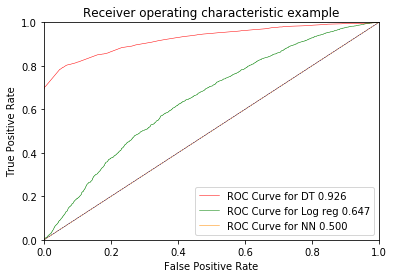

('Ensemble train accuracy:', 0.6292734677115773)
('Ensemble test accuracy:', 0.6276562981213428)
             precision    recall  f1-score   support

          0       0.93      0.27      0.42      3231
          1       0.58      0.98      0.73      3263

avg / total       0.75      0.63      0.57      6494

('ROC score of voting classifier:', 0.9241322925805053)


C:\Users\KARTHIK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\KARTHIK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\KARTHIK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [5]:
import pandas as pd
import numpy as np
import pydot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from io import StringIO
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import VotingClassifier

#reading csv file
df=pd.read_csv('CaseStudyData.csv')
df=df.drop(['PRIMEUNIT','AUCGUART'],axis=1)
df=df.drop(['PurchaseDate','WheelTypeID','PurchaseID'],axis=1)

#Data Pre-processing
Auction_map={'ADESA':0,'MANHEIM':1,'OTHER':2}
df['Auction']=df['Auction'].map(Auction_map)
df['Auction'].fillna(0,inplace=True)
df['Auction'] = df['Auction'].astype(int)

WheelType_map={'Alloy':0,'Covers':1,'Special':2,'?':0}
df['WheelType']=df['WheelType'].map(WheelType_map)
df['WheelType'].fillna(0,inplace=True)
df['WheelType'] = df['WheelType'].astype(float)

df['MMRAcquisitionAuctionCleanPrice']=df['MMRAcquisitionAuctionCleanPrice'].replace('?',np.NaN)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(skipna=True),inplace=True)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].astype(float)

df['MMRAcquisitionRetailAveragePrice']=df['MMRAcquisitionRetailAveragePrice'].replace('?',np.NaN)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(skipna=True),inplace=True)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].astype(float)

df['MMRAcquisitonRetailCleanPrice']=df['MMRAcquisitonRetailCleanPrice'].replace('?',np.NaN)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(skipna=True),inplace=True)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].astype(float)

df['MMRCurrentAuctionCleanPrice']=df['MMRCurrentAuctionCleanPrice'].replace('?',np.NaN)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(skipna=True),inplace=True)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].astype(float)

df['MMRCurrentRetailAveragePrice']=df['MMRCurrentRetailAveragePrice'].replace('?',np.NaN)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(skipna=True),inplace=True)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].astype(float)

df['MMRCurrentRetailCleanPrice']=df['MMRCurrentRetailCleanPrice'].replace('?',np.NaN)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(skipna=True),inplace=True)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].astype(float)

Make_map={'ACURA':0,'BUICK':1,'CADILLAC':3,'CHEVROLET':4,'CHRYSLER':5,'DODGE':6,'FORD':7,'GMC':8,'HONDA':9,'HYUNDAI':10,'INFINITII':11,'ISUZU':12,'JEEP':13,'KIA':14,'LEXUS':15,'LINCOLN':16,'MAZDA':17,'MERCURY':18,'MINI':19,'MITSUBISHI':20,'NISSAN':21,'OLDSMOBILE':22,'PONTIAC':23,'SATURN':24,'SCION':25,'SUBARU':26,'SUZUKI':27,'TOYOTA':27,'VOLKSWAGEN':28,'VOLVO':29,'?':4}
df['Make']=df['Make'].map(Make_map)
df['Make'].fillna(4,inplace=True)
df['Make'] = df['Make'].astype(float)

Color_map={'BEIGE':0,'BLACK':1,'BLUE':2,'BROWN':3,'GOLD':4,'GREEN':5,'GREY':6,'MAROON':7,'NOT AVAIL':8,'ORANGE':9,'OTHER':10,'PURPLE':11,'RED':12,'SILVER':13,'WHITE':14,'YELLOW':15,'?':13}
df['Color']=df['Color'].map(Color_map)
df['Color'].fillna(13,inplace=True)
df['Color'] = df['Color'].astype(int)

Transmission_map={'AUTO':0,'MANUAL':1,'?':0,'Manual':1}
df['Transmission']=df['Transmission'].map(Transmission_map)
df['Transmission'].fillna(0,inplace=True)
df['Transmission'] = df['Transmission'].astype(int)

vehodo_map={'?':df['VehOdo'].mean()}
df['VehOdo'].fillna(df['VehOdo'].mean(),inplace=True)
df['VehOdo'] = df['VehOdo'].astype(int)

Nationality_map={'AMERICAN':0,'OTHER':1,'OTHER ASIAN':2,'TOP LINE ASIAN':3,'USA':4,'?':0}
df['Nationality']=df['Nationality'].map(Nationality_map)
df['Nationality'].fillna(0,inplace=True)
df['Nationality'] = df['Nationality'].astype(int)

Size_map={'COMPACT':0,'CROSSOVER':1,'LARGE':2,'LARGE SUV':3,'LARGE TRUCK':4,'MEDIUM':5,'MEDIUM SUV':6,'SMALL SUV':7,'SMALL TRUCK':8,'SPECIALTY':9,'SPORTS':10,'VAN':11,'?':5}    
df['Size']=df['Size'].map(Size_map)
df['Size'].fillna(5,inplace=True)
df['Size'] = df['Size'].astype(int)

df['VehYear'].fillna(2006.0,inplace=True)
df['VehYear'] = df['VehYear'].astype(int)

american_name_map={'CHRYSLER':0,'FORD':1,'GM':2,'OTHER':3,'?':2}
df['TopThreeAmericanName']=df['TopThreeAmericanName'].map(american_name_map)
df['TopThreeAmericanName'].fillna(2,inplace=True)
df['TopThreeAmericanName'] = df['TopThreeAmericanName'].astype(int)

df['MMRAcquisitionAuctionAveragePrice']=df['MMRAcquisitionAuctionAveragePrice'].replace('?',np.NaN)
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(skipna=True),inplace=True)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].astype(float)

df['MMRCurrentAuctionAveragePrice']=df['MMRCurrentAuctionAveragePrice'].replace('?',np.NaN)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(skipna=True),inplace=True)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].astype(float)

df['MMRCurrentRetailRatio']=df['MMRCurrentRetailRatio'].replace(['?','#VALUE!'],np.NaN)
df['MMRCurrentRetailRatio'].fillna(df['MMRCurrentRetailRatio'].median(skipna=True),inplace=True)
df['MMRCurrentRetailRatio'] = df['MMRCurrentRetailRatio'].astype(float)

vnst_map = {'TX':0, 'FL':1,'CO':2,'NC':3,'AZ':4,'CA':5,'OK':6,'SC':7,'TN':8,'GA':9,'VA':10,'MO':11,'PA':12,'NV':13,'IN':14,'MS':15,'LA':16,'NJ':17,'NM':18,'KY':19,'AL':20,'IL':21,'UT':22,'WV':23,'WA':24,'OR':25,'NH':26,'NE':27,'OH':28,'ID':29,'NY':30,'?':0}
df['VNST'] = df['VNST'].map(vnst_map)
df['VNST'].fillna(0,inplace=True)
df['VNST'] = df['VNST'].astype(int)

df['VehBCost']=df['VehBCost'].replace(['?'],np.NaN)
df['VehBCost'].fillna(0,inplace=True)
df['VehBCost'] = df['VehBCost'].astype(int)

mmr4_map={'0':0,'1':1,'-1':1,'4':1,'2':1,'?':0}
df['IsOnlineSale']=df['IsOnlineSale'].map(mmr4_map)
df['IsOnlineSale'].fillna(0,inplace=True)
df['IsOnlineSale'] = df['IsOnlineSale'].astype(float)

ForSale_map={'Yes':0,'YES':0,'yes':0,'No':1,'?':0}
df['ForSale']=df['ForSale'].map(ForSale_map)
df['ForSale'].fillna(0,inplace=True)
df['ForSale'] = df['ForSale'].astype(float)

df['WarrantyCost'].fillna(df['WarrantyCost'].mean(),inplace=True)
df['WarrantyCost'] = df['WarrantyCost'].astype(int)

y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)
rs = 12
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .1,random_state=12)
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X_train, y_train)
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,y_res,test_size = .2,random_state=12)

# grid search CV for decision tree
params_dt = {'criterion': ['gini','entropy'],
          'max_depth': range(7, 10),
          'min_samples_leaf': range(20,60,10)}

cv = GridSearchCV(param_grid=params_dt, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(x_train_res, y_train_res)

dt_model = cv.best_estimator_
print(dt_model)

# grid search CV for logistic regression
params_log_reg = {'C': [pow(10, x) for x in range(-6, 4)]}

cv1 = GridSearchCV(param_grid=params_log_reg, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv1.fit(x_train_res, y_train_res)

log_reg_model = cv1.best_estimator_
print(log_reg_model)

# grid search CV for NN
params_nn = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv2 = GridSearchCV(param_grid=params_nn, estimator=MLPClassifier(max_iter=200, random_state=rs), cv=10, n_jobs=-1)
cv2.fit(x_train_res, y_train_res)

nn_model = cv2.best_estimator_
print(nn_model)

y_pred_dt = dt_model.predict(x_val_res)
y_pred_log_reg = log_reg_model.predict(x_val_res)
y_pred_nn = nn_model.predict(x_val_res)

print("Accuracy score on test for DecisionTree:", accuracy_score(y_val_res, y_pred_dt))
print("Accuracy score on test for logistic regression:", accuracy_score(y_val_res, y_pred_log_reg))
print("Accuracy score on test for Neural Networks:", accuracy_score(y_val_res, y_pred_nn))


# typical prediction
y_pred = dt_model.predict(x_val_res)

# probability prediction from decision tree
y_pred_proba_dt = dt_model.predict_proba(x_val_res)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = Goodbuy, 1 = Badbuy). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])
    

y_pred_proba_dt = dt_model.predict_proba(x_val_res)
y_pred_proba_log_reg = log_reg_model.predict_proba(x_val_res)
y_pred_proba_nn = nn_model.predict_proba(x_val_res)


roc_index_dt = roc_auc_score(y_val_res, y_pred_proba_dt[:, 1])
roc_index_log_reg = roc_auc_score(y_val_res, y_pred_proba_log_reg[:, 1])
roc_index_nn = roc_auc_score(y_val_res, y_pred_proba_nn[:, 1])

print("ROC index on test for DT:", roc_index_dt)
print("ROC index on test for logistic regression:", roc_index_log_reg)
print("ROC index on test for NN:", roc_index_nn)


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val_res, y_pred_proba_dt[:,1])
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_val_res, y_pred_proba_log_reg[:,1])
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_val_res, y_pred_proba_nn[:,1])

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_log_reg, tpr_log_reg, label='ROC Curve for Log reg {:.3f}'.format(roc_index_log_reg), color='green', lw=0.5)
plt.plot(fpr_nn, tpr_nn, label='ROC Curve for NN {:.3f}'.format(roc_index_nn), color='darkorange', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# initialise the classifier with 3 different estimators
voting = VotingClassifier(estimators=[('dt', dt_model), ('lr', log_reg_model), ('nn', nn_model)], voting='soft')

# fit the voting classifier to training data
voting.fit(x_train_res, y_train_res)

# evaluate train and test accuracy
print("Ensemble train accuracy:", voting.score(x_train_res, y_train_res))
print("Ensemble test accuracy:", voting.score(x_val_res, y_val_res))
y_pred_ens = voting.predict(x_val_res)
print(classification_report(y_val_res, y_pred_ens))

# evaluate ROC auc score
y_pred_proba_ensemble = voting.predict_proba(x_val_res)
roc_index_ensemble = roc_auc_score(y_val_res, y_pred_proba_ensemble[:, 1])
print("ROC score of voting classifier:", roc_index_ensemble)
